In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import *
import tensorflow as tf

Using TensorFlow backend.


In [2]:
training_data_df = pd.read_csv("sales_data_training_scaled.csv")

In [3]:
training_data_df.head()

,critic_rating,is_action,is_exclusive_to_us,is_portable,is_role_playing,is_sequel,is_sports,suitable_for_kids,total_earnings,unit_price
0,0.500000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.374714,1.0
1,0.833333,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.192425,0.5
2,0.333333,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.114852,0.5
3,0.833333,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.142452,0.0
4,0.666667,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.480682,1.0


In [4]:
training_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
critic_rating         1000 non-null float64
is_action             1000 non-null float64
is_exclusive_to_us    1000 non-null float64
is_portable           1000 non-null float64
is_role_playing       1000 non-null float64
is_sequel             1000 non-null float64
is_sports             1000 non-null float64
suitable_for_kids     1000 non-null float64
total_earnings        1000 non-null float64
unit_price            1000 non-null float64
dtypes: float64(10)
memory usage: 78.2 KB


In [5]:
X = training_data_df.drop('total_earnings', axis=1).values
Y = training_data_df[['total_earnings']].values

{'whiskers': [<matplotlib.lines.Line2D at 0xac9e5e9d68>,
 'caps': [<matplotlib.lines.Line2D at 0xac9e601710>,
 'boxes': [<matplotlib.lines.Line2D at 0xac9e5e9c18>,
 'medians': [<matplotlib.lines.Line2D at 0xac9e601da0>,
 'fliers': [<matplotlib.lines.Line2D at 0xac9e601cf8>,
 'means': []}

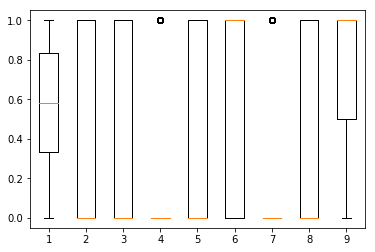

In [6]:
plt.boxplot(X)

{'whiskers': [<matplotlib.lines.Line2D at 0xaca5bee828>,
 'caps': [<matplotlib.lines.Line2D at 0xaca5beeeb8>,
 'boxes': [<matplotlib.lines.Line2D at 0xaca5bee438>],
 'medians': [<matplotlib.lines.Line2D at 0xaca5bf9588>],
 'fliers': [<matplotlib.lines.Line2D at 0xaca5bf98d0>],
 'means': []}

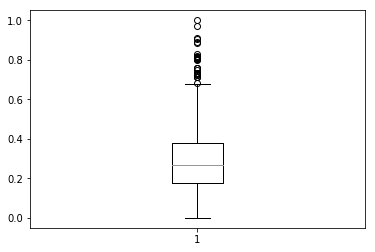

In [7]:
plt.boxplot(Y)

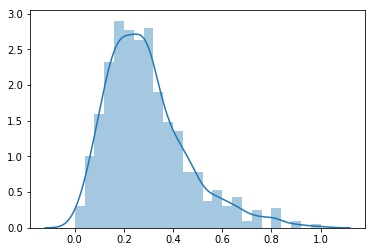

In [8]:
sns.distplot(Y)

In [9]:
# Define the model
model = Sequential()
model.add(Dense(50, input_dim=9, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='linear'))

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
#class myCallback(tf.keras.callbacks.Callback):
#    def on_epoch_end(self, epoch, logs={}):
 #       if(logs.get('acc')>0.95):
  #          print("\nReached 95% accuracy so cancelling training!")
   #         self.model.stop_training = True

#callbacks = myCallback()

In [11]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [12]:
# Train the model
model.fit(
    X,
    Y,
    epochs=50,
    #callbacks=[callbacks],
    shuffle=True,
    verbose=2
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
 - 0s - loss: 0.0478
Epoch 2/50
 - 0s - loss: 0.0070
Epoch 3/50
 - 0s - loss: 0.0026
Epoch 4/50
 - 0s - loss: 0.0013
Epoch 5/50
 - 0s - loss: 6.5339e-04
Epoch 6/50
 - 0s - loss: 3.4193e-04
Epoch 7/50
 - 0s - loss: 2.3154e-04
Epoch 8/50
 - 0s - loss: 1.5597e-04
Epoch 9/50
 - 0s - loss: 1.2316e-04
Epoch 10/50
 - 0s - loss: 1.0452e-04
Epoch 11/50
 - 0s - loss: 7.6185e-05
Epoch 12/50
 - 0s - loss: 6.7474e-05
Epoch 13/50
 - 0s - loss: 6.7785e-05
Epoch 14/50
 - 0s - loss: 5.8015e-05
Epoch 15/50
 - 0s - loss: 4.8235e-05
Epoch 16/50
 - 0s - loss: 4.7734e-05
Epoch 17/50
 - 0s - loss: 4.3582e-05
Epoch 18/50
 - 0s - loss: 3.6167e-05
Epoch 19/50
 - 0s - loss: 4.1211e-05
Epoch 20/50
 - 0s - loss: 4.0050e-05
Epoch 21/50
 - 0s - loss: 3.9023e-05
Epoch 22/50
 - 0s - loss: 3.4716e-05
Epoch 23/50
 - 0s - loss: 3.1930e-05
Epoch 24/50
 - 0s - loss: 3.5221e-05
Epoch 25/50
 - 0s - loss: 3.4301e-05
Epoch 26/50
 - 0s - loss: 2.4794e-05
Epoch 27/50
 - 

In [13]:
test_data_df = pd.read_csv("sales_data_test_scaled.csv")


In [14]:
X_test = test_data_df.drop('total_earnings', axis=1).values
Y_test = test_data_df[['total_earnings']].values

{'whiskers': [<matplotlib.lines.Line2D at 0xaca83bc828>,
 'caps': [<matplotlib.lines.Line2D at 0xaca83bceb8>,
 'boxes': [<matplotlib.lines.Line2D at 0xaca83bc400>,
 'medians': [<matplotlib.lines.Line2D at 0xaca83c9588>,
 'fliers': [<matplotlib.lines.Line2D at 0xaca83c98d0>,
 'means': []}

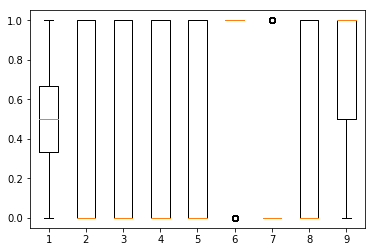

In [15]:
plt.boxplot(X_test)

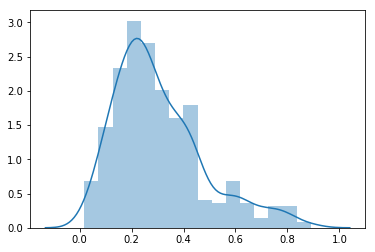

In [16]:
sns.distplot(Y_test)

In [17]:
test_error_rate = model.evaluate(X_test, Y_test, verbose=0)

In [18]:
print("The mean squared error (MSE) for the test data set is: {}".format(test_error_rate))

The mean squared error (MSE) for the test data set is: 9.061983451829292e-05
